In [10]:
string = "SGD_mean_squared_error\
335\
SGD_mean_absolute_error\
490\
SGD_mean_absolute_percentage_error\
200\
SGD_mean_squared_logarithmic_error\
511\
SGD_squared_hinge\
342\
SGD_hinge\
442\
SGD_categorical_hinge\
400\
SGD_logcosh\
458\
SGD_binary_crossentropy\
511\
SGD_kullback_leibler_divergence\
511\
SGD_poisson\
511\
SGD_cosine_proximity\
196\
RMSprop_mean_squared_error\
223\
RMSprop_mean_absolute_error\
294\
RMSprop_mean_absolute_percentage_error\
256\
RMSprop_mean_squared_logarithmic_error\
500\
RMSprop_squared_hinge\
225\
RMSprop_hinge\
268\
RMSprop_categorical_hinge\
289\
RMSprop_logcosh\
226\
RMSprop_binary_crossentropy\
478\
RMSprop_kullback_leibler_divergence\
511\
RMSprop_poisson\
510\
RMSprop_cosine_proximity\
196\
Adagrad_mean_squared_error\
446\
Adagrad_mean_absolute_error\
495\
Adagrad_mean_absolute_percentage_error\
505\
Adagrad_mean_squared_logarithmic_error\
511\
Adagrad_squared_hinge\
470\
Adagrad_hinge\
498\
Adagrad_categorical_hinge\
437\
Adagrad_logcosh\
429\
Adagrad_binary_crossentropy\
508\
Adagrad_kullback_leibler_divergence\
511\
Adagrad_poisson\
512\
Adagrad_cosine_proximity\
452\
Adadelta_mean_squared_error\
283\
Adadelta_mean_absolute_error\
308\
Adadelta_mean_absolute_percentage_error\
308\
Adadelta_mean_squared_logarithmic_error\
496\
Adadelta_squared_hinge\
286\
Adadelta_hinge\
310\
Adadelta_categorical_hinge\
308\
Adadelta_logcosh\
297\
Adadelta_binary_crossentropy\
500\
Adadelta_kullback_leibler_divergence\
511\
Adadelta_poisson\
512\
Adadelta_cosine_proximity\
197\
Adam_mean_squared_error\
194\
Adam_mean_absolute_error\
234\
Adam_mean_absolute_percentage_error\
224\
Adam_mean_squared_logarithmic_error\
509\
Adam_squared_hinge\
186\
Adam_hinge\
243\
Adam_categorical_hinge\
294\
Adam_logcosh\
202\
Adam_binary_crossentropy\
463\
Adam_kullback_leibler_divergence\
511\
Adam_poisson\
512\
Adam_cosine_proximity\
149\
Adamax_mean_squared_error\
243\
Adamax_mean_absolute_error\
272\
Adamax_mean_absolute_percentage_error\
284\
Adamax_mean_squared_logarithmic_error\
507\
Adamax_squared_hinge\
244\
Adamax_hinge\
284\
Adamax_categorical_hinge\
280\
Adamax_logcosh\
272\
Adamax_binary_crossentropy\
509\
Adamax_kullback_leibler_divergence\
511\
Adamax_poisson\
509\
Adamax_cosine_proximity\
222\
Nadam_mean_squared_error\
157\
Nadam_mean_absolute_error\
181\
Nadam_mean_absolute_percentage_error\
179\
Nadam_mean_squared_logarithmic_error\
491\
Nadam_squared_hinge\
155\
Nadam_hinge\
184\
Nadam_categorical_hinge\
354\
Nadam_logcosh\
165\
Nadam_binary_crossentropy\
488\
Nadam_kullback_leibler_divergence\
511\
Nadam_poisson\
509\
Nadam_cosine_proximity\
151"

In [13]:
import re

In [95]:
import numpy as np

In [152]:
numbers = np.array([float(i) for i in re.split(r"[a-zA-Z_]+", string)[1:]])
names = re.split(r"[0-9]+", string)
optimizers = np.array([re.split(r"_", i)[0] for i in names])
losses = np.array(["_".join(re.split(r"_", i)[1:]) for i in names])

In [153]:
import pandas as pd

In [154]:
optimizers = optimizers[:-1].reshape(-1,1)
losses = losses[:-1].reshape(-1,1)
numbers = numbers.reshape(-1,1)

In [155]:
data = np.hstack((losses, numbers))
data = np.hstack((optimizers, data))

In [156]:
data = pd.DataFrame(data, columns=["optimizer", "loss", "count"])

In [165]:
data["count"] = data["count"].astype(float)

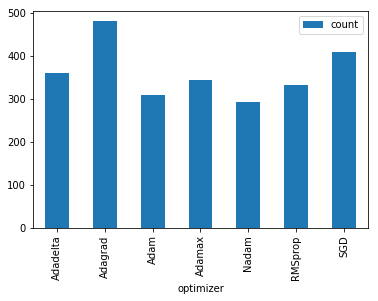

In [176]:
data.groupby("optimizer").mean().plot.bar()

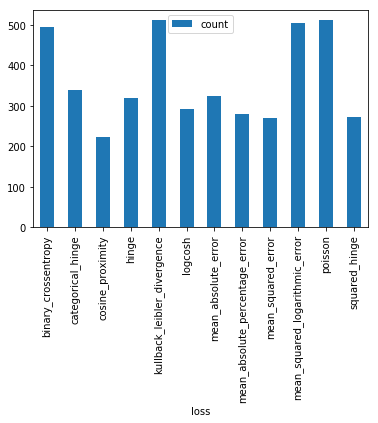

In [177]:
data.groupby("loss").mean().plot.bar()

In [181]:
data.sort_values(by=['count'])

optimizer                            loss  count
59      Adam                cosine_proximity  149.0
83     Nadam                cosine_proximity  151.0
76     Nadam                   squared_hinge  155.0
72     Nadam              mean_squared_error  157.0
79     Nadam                         logcosh  165.0
74     Nadam  mean_absolute_percentage_error  179.0
73     Nadam             mean_absolute_error  181.0
77     Nadam                           hinge  184.0
52      Adam                   squared_hinge  186.0
48      Adam              mean_squared_error  194.0
11       SGD                cosine_proximity  196.0
23   RMSprop                cosine_proximity  196.0
47  Adadelta                cosine_proximity  197.0
2        SGD  mean_absolute_percentage_error  200.0
55      Adam                         logcosh  202.0
71    Adamax                cosine_proximity  222.0
12   RMSprop              mean_squared_error  223.0
50      Adam  mean_absolute_percentage_error  224.0
16   RMSprop                   squared_hinge  225.0
19   RMSprop                         logcosh  226.0
49      Adam             mean_absolute_error  234.0
53      Adam                           hinge  243.0
60    Adamax              mean_squared_error  243.0
64    Adamax                   squared_hinge  244.0
14   RMSprop  mean_absolute_percentage_error  256.0
17   RMSprop                           hinge  268.0
61    Adamax             mean_absolute_error  272.0
67    Adamax                         logcosh  272.0
66    Adamax               categorical_hinge  280.0
36  Adadelta              mean_squared_error  283.0
..       ...                             ...    ...
80     Nadam             binary_crossentropy  488.0
1        SGD             mean_absolute_error  490.0
75     Nadam  mean_squared_logarithmic_error  491.0
25   Adagrad             mean_absolute_error  495.0
39  Adadelta  mean_squared_logarithmic_error  496.0
29   Adagrad                           hinge  498.0
15   RMSprop  mean_squared_logarithmic_error  500.0
44  Adadelta             binary_crossentropy  500.0
26   Adagrad  mean_absolute_percentage_error  505.0
63    Adamax  mean_squared_logarithmic_error  507.0
32   Adagrad             binary_crossentropy  508.0
70    Adamax                         poisson  509.0
68    Adamax             binary_crossentropy  509.0
82     Nadam                         poisson  509.0
51      Adam  mean_squared_logarithmic_error  509.0
22   RMSprop                         poisson  510.0
10       SGD                         poisson  511.0
69    Adamax     kullback_leibler_divergence  511.0
8        SGD             binary_crossentropy  511.0
57      Adam     kullback_leibler_divergence  511.0
27   Adagrad  mean_squared_logarithmic_error  511.0
33   Adagrad     kullback_leibler_divergence  511.0
3        SGD  mean_squared_logarithmic_error  511.0
45  Adadelta     kullback_leibler_divergence  511.0
81     Nadam     kullback_leibler_divergence  511.0
9        SGD     kullback_leibler_divergence  511.0
21   RMSprop     kullback_leibler_divergence  511.0
58      Adam                         poisson  512.0
46  Adadelta                         poisson  512.0
34   Adagrad                         poisson  512.0

[84 rows x 3 columns]